In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ipympl


#import the ipywidgets module and the IPython display function
from ipywidgets import interactive, HBox, Layout, Button, GridspecLayout
import ipywidgets as widgets
from IPython.display import display, clear_output

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

In [2]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

In [3]:
headline = widgets.HTML(value="<h1>Analysis of Poetry using Random Forest Classifier</h1>")
headline

HTML(value='<h1>Analysis of Poetry using Random Forest Classifier</h1>')

In [4]:



text_1 = widgets.HTML(value="<h4>Upload data file in .csv format</h4>")


button_execute = widgets.Button(
                description='Analyze',
                tooltip='success',
                style={'description_width': 'initial'}
            )

#upload btn
uploader = widgets.FileUpload(
    accept='*.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

#styles
button_execute.style.button_color = 'lime'
uploader.style.button_color = 'yellow'

#hbox and vbox
liner = widgets.VBox([text_1, uploader])
page = widgets.HBox([ liner])
display(page)
#df = pd.read_csv("./input/all.csv")
content = '';
def on_button_clicked(event):
        input_file = list(uploader.value.values())[0]
        content = input_file['content']
        content = io.StringIO(content.decode('utf-8'))
        df = pd.read_csv(content) 
        print("Analyzed csv file!")
    
button_execute.on_click(on_button_clicked)
button_execute

Button(description='Analyze', style=ButtonStyle(button_color='lime'), tooltip='success')

In [5]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from spacy.lang.en import English
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("./input/all.csv")

In [7]:
#df.head()

In [8]:
author_list = df['author'].tolist()

author_list[0:5]

In [9]:
sentences1 = df['content'].tolist()

In [10]:
#df['content']

In [11]:
sentences2 = list()
for element in sentences1:
    element = element.replace("\n"," ")
    element = element.replace("\r","")
    element = element.replace(",","")
    element = element.replace(".","")
    element = element.replace(";","")
    element = element.replace(":","")
    element = element.replace("?","")
    element = element.replace("!","")
    sentences2.append(element)

In [12]:
sent_list = []
for i in range (len(sentences2)):
    str1 = sentences2[i].split(" ")
    sent_list.append(str1)
#print(sent_list[0])

In [13]:
#print(len(sent_list))
#print(len(author_list))

In [14]:
#Removing the blank spaces
b = list()
for mylist in sent_list:
    temp = list()
    for word in mylist:
        if word is not "":
            temp.append(word)
    b.append(temp)
sent_list = b

In [15]:
Nouns = 0
Verbs = 0
Adjectives = 0
noun_count = []
verb_count = []
adjective_count = []

for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        #print(sent_list[i][j])
        word = nlp(sent_list[i][j])
        for token in word:
            if token.pos_ == 'VERB':
                Verbs= Verbs + 1
            elif token.pos_ == 'NOUN':
                Nouns= Nouns + 1
            elif token.pos_ == 'ADJ':
                Adjectives= Adjectives + 1
    noun_count.append(Nouns)
    verb_count.append(Verbs)
    adjective_count.append(Adjectives)
Nouns = 0
Verbs = 0
Adjective = 0
            

In [16]:
#print(len(noun_count), len(verb_count), len(adjective_count))

In [17]:
df.loc[:, "noun_count"] = noun_count
df.loc[:, "verb_count"] = verb_count
df.loc[:, "adjective_count"] = adjective_count

In [18]:
#df.head()

In [19]:
#splitting the text in to words for analysis purpose
parsed = list()
for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        if sent_list[i][j] not in parsed:
            p1 = sent_list[i][j].split(' ')
            parsed.append(p1)

In [20]:
#print("Total Nouns in the data set",df['noun_count'].sum())
#print("Total Verbs in the data set",df['verb_count'].sum())
#print("Total Adjectives in the data set", df['adjective_count'].sum())

In [21]:
"""
    Number Remover
"""
number_remove = []
for sublist in sent_list:
    mysublist = []
    for word in sublist:
        myword = ""
        for alphaneumeric in list(word):
            if re.search("[0-9]", alphaneumeric):
                pass
            else:
                myword+=alphaneumeric
        mysublist.append(myword)
    number_remove.append(mysublist)
#number_remove[0]

In [22]:
#len(parsed)

In [23]:
stopwords = STOP_WORDS

In [24]:
s = []

for i in range(len(sent_list)):
    for str in sent_list[i]:
        s_list = [word for word in str.split(" ") if word not in stopwords]
        #print(s_list)
        str_ = ' '.join(s_list)   
    s.append(str_) 
        #print(s)
   

In [25]:
#creating a list of unique words
parsed_stop = []
for i in range(len(s)):
    for word in s[i].split(' '):
        if word not in parsed_stop:
            parsed_stop.append(word)
#print(parsed_stop)

In [26]:
import seaborn as sns
import itertools
import collections
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [27]:
filtered_sentence =[] 
for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        #print(sent_list[i][j])
        word = nlp(sent_list[i][j])
        for token in word:
            token_list = []
            #toke.lower
            token_list.append(token.lower_)
            for word in token_list:
                lexeme = nlp.vocab[word]
                if (lexeme.is_stop == False) and (lexeme.is_punct == False) and (lexeme.is_oov == True):
                     filtered_sentence.append(word)


In [28]:
# Create counter
counts_no_stopwords = collections.Counter(filtered_sentence)

#counts_no_stopwords.most_common(15)

In [29]:
import matplotlib.pyplot as plt
%matplotlib widget

clean_sentences = pd.DataFrame(counts_no_stopwords.most_common(50),
                             columns=['words', 'count'])

#original1 gayab

In [30]:
comment_words = ' '
for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        comment_words = comment_words + sent_list[i][j] + ' '         

In [31]:
from wordcloud import WordCloud

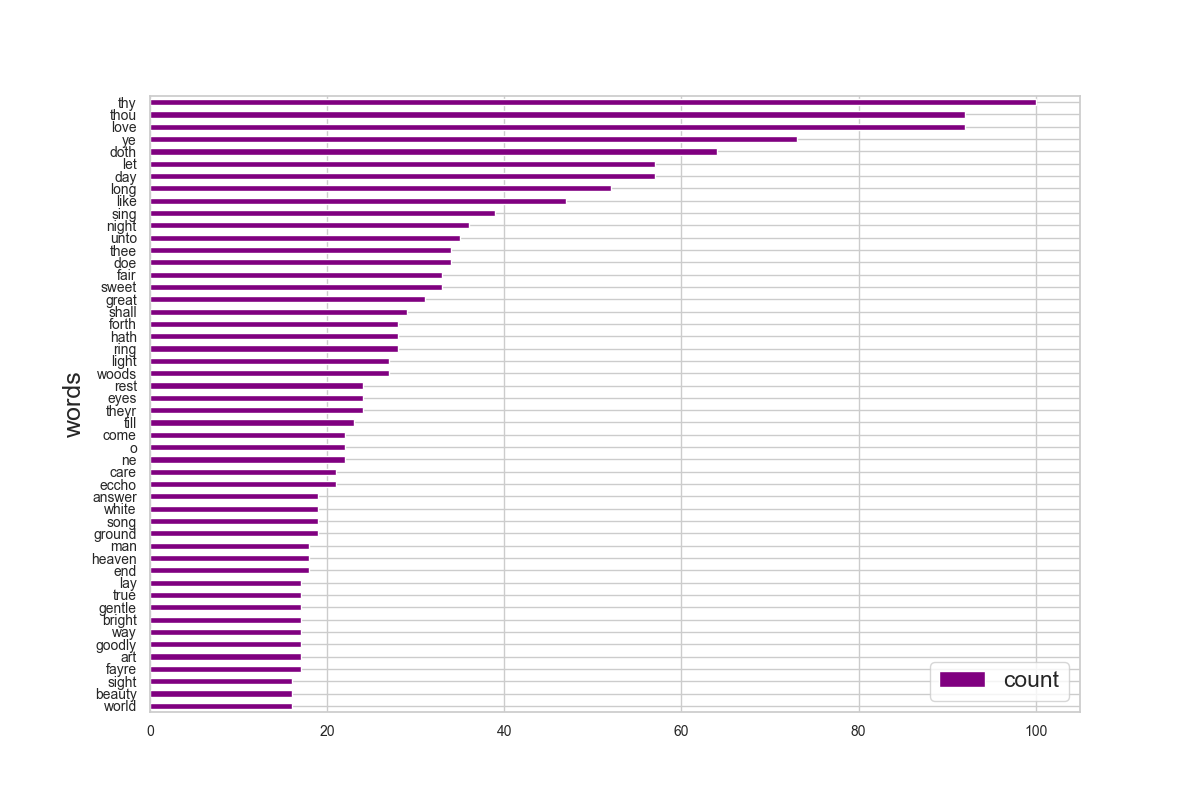

In [32]:
wordcloud = WordCloud(width = 800, height = 800, 
background_color ='white', 
stopwords = stopwords, 
min_font_size = 10).generate(comment_words) 

fig, ax = plt.subplots(figsize=(12,8))



text_3= widgets.HTML(value="<h1>Common Words Found in the Poems without stopwords</h1>");

vbox_text3= widgets.VBox([text_3])

page = widgets.HBox([vbox_text3])
display(page)


# Plot horizontal bar graph
clean_sentences.sort_values(by='count').plot.barh(fontsize=10,x='words',
                      y='count',
                      ax=ax,
                      color="purple")


plt.show()





#original2 gayab
# plot the WordCloud image
#lt.figure(figsize = (5, 5), facecolor = None) 
#lt.imshow(wordcloud) 
#lt.axis("off") 
#lt.tight_layout(pad = 0) 

#lt.show()

In [33]:
cnt_vectorizer = CountVectorizer()
features = cnt_vectorizer.fit_transform(s)
features_nd = features.toarray()

In [34]:
df_subset = pd.DataFrame({"age": df['age'], "type": df['type'], "Noun_count":df['noun_count'], 
                                  "Verb_count":df['verb_count'], "Adjective_count":df['adjective_count']})

In [35]:
df_subset = pd.get_dummies(df_subset)

In [36]:
Final = np.column_stack((features_nd,df_subset))

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test  = train_test_split(Final, author_list, train_size=0.75,random_state=1234)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [40]:
clf1 = MultinomialNB()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
#accuracy_score(y_test, y_pred)

In [41]:
from sklearn.svm import SVC
clf2 =SVC()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
#accuracy_score(y_test, y_pred)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#accuracy_score(y_test, y_pred)

In [43]:
#df['type'].unique()

In [44]:
#df['author'].unique()

In [45]:
#df['age'].unique()

In [46]:
df_modern = df[df['age'] == 'Modern']

In [47]:
#df_modern.head(10)

In [48]:
#df_modern['author'].unique()

In [49]:
modern_poetry = df_modern[['author', 'poem name']].drop_duplicates()

In [50]:
#modern_poetry.head(10)

In [51]:
authors = df['author'].unique()

In [52]:
#authors

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
age = df['age'].unique()

In [55]:
genre = df['type'].unique()

In [56]:
#df['age'].value_counts()

In [57]:
#df['type'].value_counts()

In [58]:
G =nx.Graph()

In [59]:
G.add_nodes_from(age)

In [60]:
G.add_nodes_from(genre)

In [61]:
G.add_nodes_from(authors)

In [62]:
#G.nodes()

In [63]:
myEdges = [tuple(element) for element in df[['author','type']].values]
myEdges2 = [tuple(element) for element in df[['author', 'age']].values]
myEdges3 = [tuple(element) for element in df[['age', 'type']].values]

In [64]:
G.add_edges_from(myEdges)
G.add_edges_from(myEdges2)
G.add_edges_from(myEdges3)

In [65]:
#myEdges

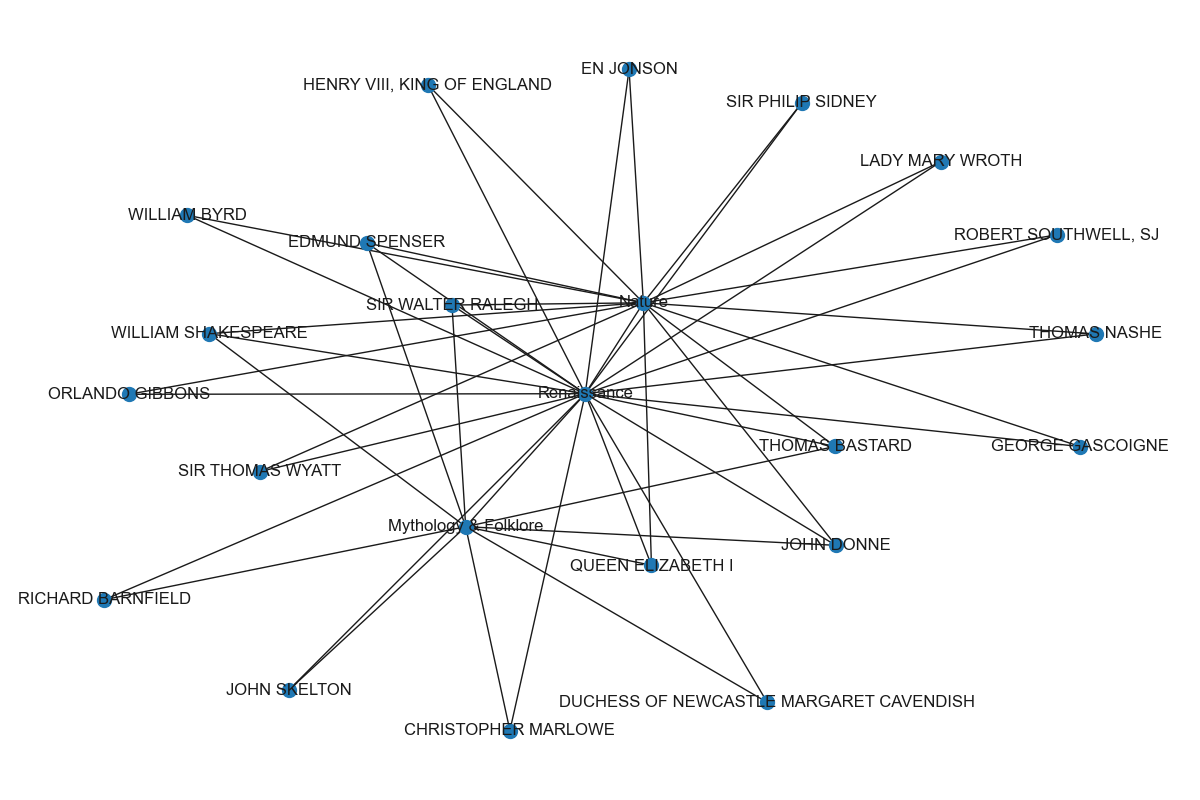

In [66]:
text_2 = widgets.HTML(value="<h1>Network Graph</h1>")

vbox_text2 = widgets.VBox([text_2])

page = widgets.HBox([vbox_text2])
display(page)

#%matplotlib inline
#fig = plt.figure(3, figsize=(20, 10))
fig = plt.figure(3, figsize=(12, 8))
nx.draw_spring(G, with_labels=True, font_weight='normal',font_size=12,node_size=100)
plt.show()

In [67]:
#nx.density(G)

In [68]:
#nx.number_of_nodes(G)

In [69]:
#nx.number_of_edges(G)

In [70]:
#nx.closeness_centrality(G)

In [71]:
#nx.betweenness_centrality(G)

In [72]:
#nx.degree_centrality(G)

In [73]:
#cross_tab = pd.crosstab(df['age'],df['type'],margins=True)
#cross_tab = pd.crosstab(df['type'],df['age'],margins=True)
#cross_tab.iloc[:-1,:-1].plot(kind='barh',stacked=True, color=['red','blue', 'yellow'], grid=False,fontsize=10,figsize=(15,6))



In [74]:
#print(cross_tab)

In [75]:
#cross_tab2 = pd.crosstab(df['author'],df['type'],margins=True)
#print(cross_tab2)

#fig, axes = plt.subplots(nrows=1, ncols=2, squeeze='False')

#df1.plot(ax=axes[0,0])
#cross_tab.iloc[:-1,:-1].plot(ax=axes[0], kind='bar',stacked=True, color=['red','blue', 'yellow'], grid=False,fontsize=10,figsize=(5,6))
#df2.plot(ax=axes[0,1])
#cross_tab2.iloc[:-1,:-1].plot(ax=axes[1], kind='bar',stacked=True, color=['red','turquoise', 'green'], grid=False,fontsize=8,figsize=(12,5))

<AxesSubplot:ylabel='age'>

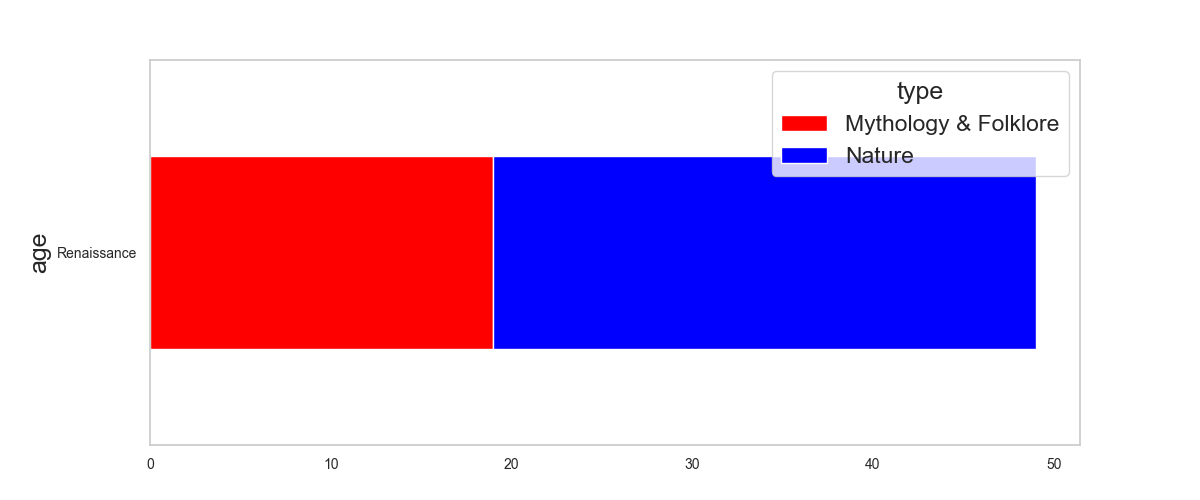

In [76]:
text_1 = widgets.HTML(value="<h1>Types of Genres</h1>")

vbox_text1 = widgets.VBox([text_1])

page = widgets.HBox([vbox_text1])
display(page)
cross_tab = pd.crosstab(df['age'],df['type'],margins=True)

cross_tab.iloc[:-1,:-1].plot(kind='barh',stacked=True, color=['red','blue', 'yellow'], grid=False,fontsize=10,figsize=(12,5))

In [77]:
cross_tab2 = pd.crosstab(df['author'],df['type'],margins=True)
#print(cross_tab2)

<AxesSubplot:xlabel='author'>

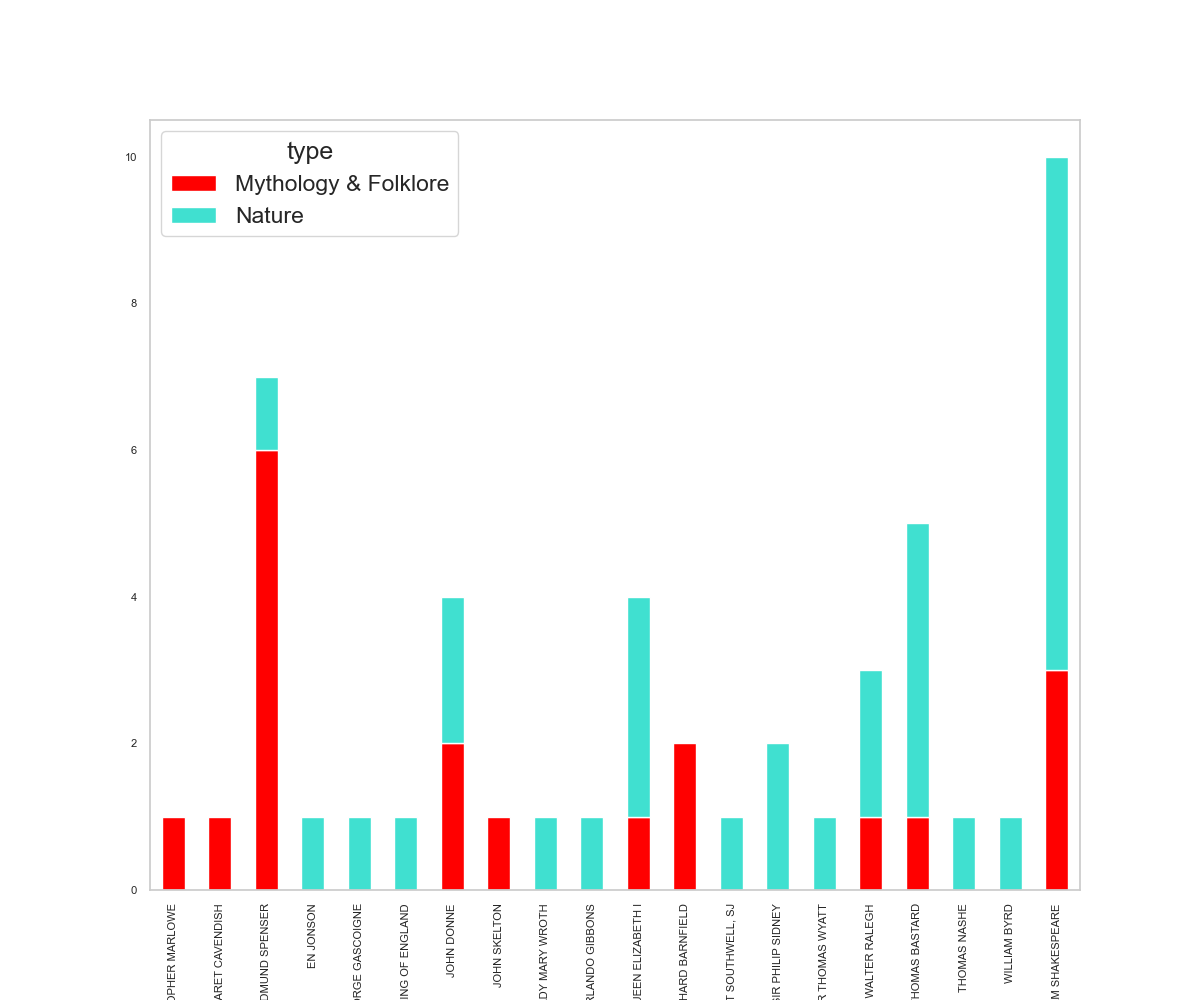

In [78]:
text_0 = widgets.HTML(value="<h1>Analysis of Poetry</h1>")

vbox_text = widgets.VBox([text_0])

page = widgets.HBox([vbox_text])
display(page)

cross_tab2.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','turquoise', 'green'], grid=False,fontsize=8,figsize=(12,10))

In [79]:
!pip freeze > requirements.txt